## Simple Linear Regression

## Delivery Time - Predicting Delivery_Time using Sorting_Time

In [102]:
#import Data_Set
import warnings
warnings.filterwarnings('ignore')

In [103]:
import pandas as pd
import numpy as np
df=pd.read_csv("D:\\assignment\\simple_linear_regression\\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [104]:
#rename the column so that it could fit the the formula
df1=df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [106]:
#correlation
df1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

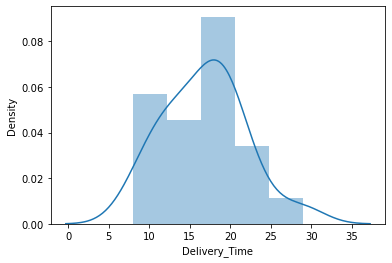

In [107]:
import seaborn as sns
sns.distplot(df1["Delivery_Time"])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

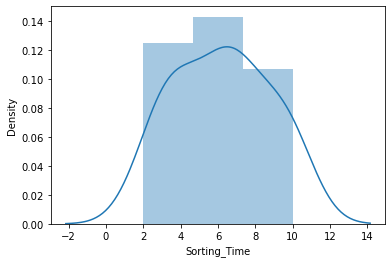

In [108]:
sns.distplot(df1["Sorting_Time"])

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
y=df1['Delivery_Time'].values
x=df1['Sorting_Time'].values

In [111]:
x

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5], dtype=int64)

In [112]:
y

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

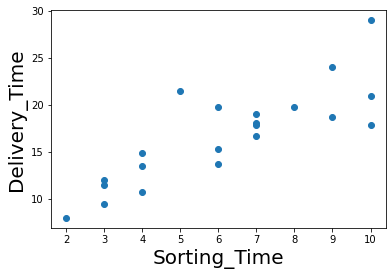

In [113]:
plt.scatter(x,y)
plt.xlabel("Sorting_Time",fontsize=20)
plt.ylabel("Delivery_Time",fontsize=20)
plt.show()

In [114]:
#Fitting linear Regression model
import statsmodels.formula.api as smf
df=smf.ols("Delivery_Time~Sorting_Time",data = df1).fit()

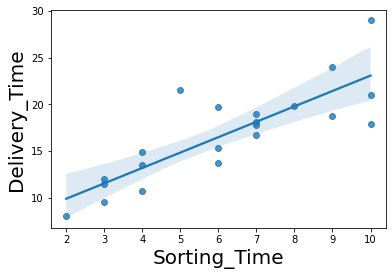

In [115]:
sns.regplot(x,y)
plt.xlabel("Sorting_Time",fontsize=20)
plt.ylabel("Delivery_Time",fontsize=20)
plt.show()

In [116]:
print(df.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        01:20:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823   

In [117]:
#p-value
print(df.pvalues)

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [118]:
#t-value
print(df.tvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64


In [119]:
#accuracy
(df.rsquared,df.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [120]:
#coefficient
df.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

[23.0727 13.1787 16.4767 21.4237 23.0727 16.4767 18.1257 11.5297 23.0727
 21.4237 19.7747 13.1787 18.1257 11.5297 11.5297 13.1787 16.4767 18.1257
  9.8807 18.1257 14.8277]


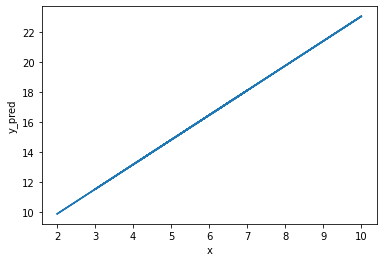

In [121]:
y_pred=6.5827+1.649*x
print(y_pred)
fig=plt.plot(x,y_pred,label="regression line")
plt.xlabel("x")
plt.ylabel("y_pred")
plt.show()

In [122]:
#to check the fitted values
df.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [123]:
#generating residual values
#actual value - predicted values
df.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

0    30
1    40
2    51
3    55
dtype: int64 0    56.0527
1    72.5427
2    90.6817
3    97.2777
dtype: float64


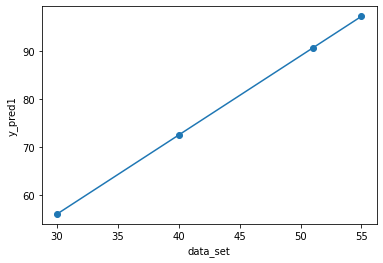

In [124]:
#predicting for new data points
x1=pd.Series([30,40,51,55])
x1

y_pred1=6.5827+1.649*x1
y_pred
z=pd.DataFrame({'data_set':x1,'y_pred':y_pred1})
z

fig=plt.plot(x1,y_pred1,label="regression line")
print(x1,y_pred1)
plt.xlabel("data_set")
plt.ylabel("y_pred1")
plt.scatter(x1,y_pred1)

## TRANSFORMATIONS

## Square_root_Transformations

In [125]:
Sorting_Time_SQRT = np.sqrt(x)
Sorting_Time_SQRT

array([3.16227766, 2.        , 2.44948974, 3.        , 3.16227766,
       2.44948974, 2.64575131, 1.73205081, 3.16227766, 3.        ,
       2.82842712, 2.        , 2.64575131, 1.73205081, 1.73205081,
       2.        , 2.44948974, 2.64575131, 1.41421356, 2.64575131,
       2.23606798])

In [126]:
Delivery_Time_SQRT = np.sqrt(y)
Delivery_Time_SQRT

array([4.58257569, 3.67423461, 4.44409721, 4.89897949, 5.38516481,
       3.9179076 , 4.35889894, 3.082207  , 4.23083916, 4.33012702,
       4.45308882, 3.27871926, 4.08411557, 3.39116499, 3.46842904,
       3.8574603 , 3.70809924, 4.25558457, 2.82842712, 4.22255847,
       4.63680925])

In [127]:
Delivery_Time_SQRT=pd.DataFrame(Delivery_Time_SQRT)
Delivery_Time_SQRT

,0
0,4.582576
1,3.674235
2,4.444097
3,4.898979
4,5.385165
5,3.917908
6,4.358899
7,3.082207
8,4.230839
9,4.330127


In [128]:
Sorting_Time_SQRT=pd.DataFrame(Sorting_Time_SQRT)
Sorting_Time_SQRT

,0
0,3.162278
1,2.000000
2,2.449490
3,3.000000
4,3.162278
5,2.449490
6,2.645751
7,1.732051
8,3.162278
9,3.000000


In [129]:
model_sqrt= smf.ols('Delivery_Time_SQRT~Sorting_Time_SQRT',data = df1).fit()

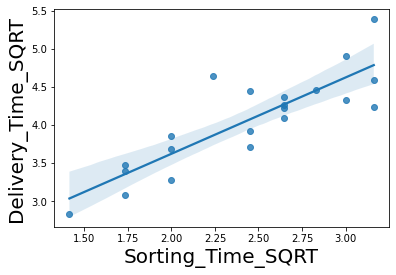

In [130]:
sns.regplot(Sorting_Time_SQRT,Delivery_Time_SQRT)
plt.xlabel("Sorting_Time_SQRT",fontsize=20)
plt.ylabel("Delivery_Time_SQRT",fontsize=20)
plt.show()

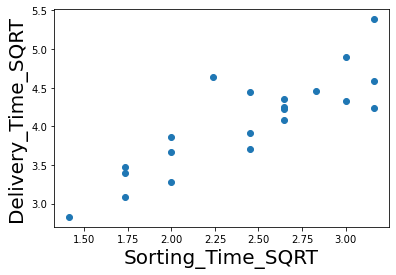

In [131]:
plt.scatter(Sorting_Time_SQRT,Delivery_Time_SQRT)
plt.xlabel("Sorting_Time_SQRT",fontsize=20)
plt.ylabel("Delivery_Time_SQRT",fontsize=20)
plt.show()

## Cube_root_transformation

In [132]:
Sorting_Time_CBRT = np.cbrt(x)
Sorting_Time_CBRT

array([2.15443469, 1.58740105, 1.81712059, 2.08008382, 2.15443469,
       1.81712059, 1.91293118, 1.44224957, 2.15443469, 2.08008382,
       2.        , 1.58740105, 1.91293118, 1.44224957, 1.44224957,
       1.58740105, 1.81712059, 1.91293118, 1.25992105, 1.91293118,
       1.70997595])

In [133]:
Delivery_Time_CBRT= np.cbrt(y)
Delivery_Time_CBRT

array([2.75892418, 2.38110158, 2.70306009, 2.88449914, 3.07231683,
       2.48524644, 2.66840165, 2.11791179, 2.61587915, 2.65664642,
       2.70670487, 2.20700248, 2.55504576, 2.25717872, 2.29133475,
       2.45961789, 2.39570993, 2.6260691 , 2.        , 2.6124648 ,
       2.78064888])

In [134]:
Delivery_Time_CBRT=pd.DataFrame(Delivery_Time_CBRT)
Delivery_Time_CBRT

,0
0,2.758924
1,2.381102
2,2.703060
3,2.884499
4,3.072317
5,2.485246
6,2.668402
7,2.117912
8,2.615879
9,2.656646


In [135]:
Sorting_Time_CBRT=pd.DataFrame(Sorting_Time_CBRT)
Sorting_Time_CBRT

,0
0,2.154435
1,1.587401
2,1.817121
3,2.080084
4,2.154435
5,1.817121
6,1.912931
7,1.442250
8,2.154435
9,2.080084


In [136]:
model_CBRT= smf.ols('Delivery_Time_CBRT~Sorting_Time_CBRT',data = df1).fit()

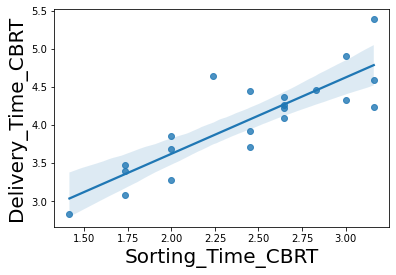

In [137]:
sns.regplot(Sorting_Time_SQRT,Delivery_Time_SQRT)
plt.xlabel("Sorting_Time_CBRT",fontsize=20)
plt.ylabel("Delivery_Time_CBRT",fontsize=20)
plt.show()

## Log_Transformation

In [138]:
Sorting_Time_LOG= np.log(x)
Sorting_Time_LOG

array([2.30258509, 1.38629436, 1.79175947, 2.19722458, 2.30258509,
       1.79175947, 1.94591015, 1.09861229, 2.30258509, 2.19722458,
       2.07944154, 1.38629436, 1.94591015, 1.09861229, 1.09861229,
       1.38629436, 1.79175947, 1.94591015, 0.69314718, 1.94591015,
       1.60943791])

In [139]:
Delivery_Time_LOG= np.log(y)
Delivery_Time_LOG

array([3.04452244, 2.60268969, 2.98315349, 3.17805383, 3.36729583,
       2.73111547, 2.94443898, 2.2512918 , 2.88480071, 2.93119375,
       2.98719594, 2.37490575, 2.8142104 , 2.44234704, 2.48740353,
       2.70001803, 2.62103882, 2.89646427, 2.07944154, 2.88088243,
       3.06805294])

In [140]:
Delivery_Time_LOG=pd.DataFrame(Delivery_Time_LOG)
Delivery_Time_LOG

,0
0,3.044522
1,2.602690
2,2.983153
3,3.178054
4,3.367296
5,2.731115
6,2.944439
7,2.251292
8,2.884801
9,2.931194


In [141]:
Sorting_Time_LOG=pd.DataFrame(Sorting_Time_LOG)
Sorting_Time_LOG

,0
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585
5,1.791759
6,1.945910
7,1.098612
8,2.302585
9,2.197225


In [142]:
model_LOG= smf.ols('Delivery_Time_LOG~Sorting_Time_LOG',data = df1).fit()

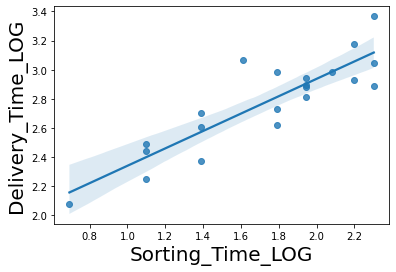

In [143]:
sns.regplot(Sorting_Time_LOG,Delivery_Time_LOG)
plt.xlabel("Sorting_Time_LOG",fontsize=20)
plt.ylabel("Delivery_Time_LOG",fontsize=20)
plt.show()